<a href="https://colab.research.google.com/github/ozcannrabia/feature-engineering/blob/main/diabetes_uyg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [ ]:
def load():
  df = pd.read_csv("diabetes.csv")
  return df
df = load()

1 - GENEL RESİM

In [ ]:
import pandas as pd

def eda_summary(df):
    """
    Keşifsel Veri Analizi için özet fonksiyon.

    Args:
    - df (pd.DataFrame): Analiz yapılacak pandas DataFrame.

    Returns:
    - None: Fonksiyon çıktıları ekrana yazdırır.
    """
    print("📊 Genel Bilgiler:")
    print("-" * 40)
    print(f"Satır ve Sütun Sayısı: {df.shape}")
    print("\nSütun İsimleri:")
    print(df.columns)
    print("-" * 40)

    print("\n🧹 Eksik Değerler:")
    print(df.isnull().sum())
    print("-" * 40)

    print("\n👀 İlk 5 Satır:")
    print(df.head())
    print("-" * 40)

    print("\n🔍 Veri Tipleri:")
    print(df.info())
    print("-" * 40)

    print("\n📈 Temel İstatistikler:")
    print(df.describe().T)  # Daha düzenli bir görünüm için Transpose
    print("-" * 40)

    print("\n🛠 Tekil Değer Sayıları:")
    print(df.nunique())
    print("-" * 40)

    print("\n✅ Veri Setindeki Sınıf Dağılımı (Eğer 'Outcome' varsa):")
    if 'Outcome' in df.columns:
        print(df['Outcome'].value_counts())
    else:
        print("Hedef sütun bulunamadı.")
    print("-" * 40)


In [ ]:
eda_summary(df)

📊 Genel Bilgiler:
----------------------------------------
Satır ve Sütun Sayısı: (768, 9)

Sütun İsimleri:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
----------------------------------------

🧹 Eksik Değerler:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
----------------------------------------

👀 İlk 5 Satır:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66     

2 - SAYISAL VE KATEGORİK DEĞİŞKENLER

In [ ]:
# veri tiplerini belirleme
def grab_col_names(dataframe, cat_th=10, car_th=20):
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
  num_cols = [col for col in num_cols if col not in num_but_cat]

  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f'cat_cols: {len(cat_cols)}')
  print(f'num_cols: {len(num_cols)}')
  print(f'cat_but_car: {len(cat_but_car)}')
  print(f'num_but_cat: {len(num_but_cat)}')
  return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols, num_cols, cat_but_car

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


(['Outcome'],
 ['Pregnancies',
  'Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age'],
 [])

3 - SAYISAL VE KATEGORİK DEĞİŞKEN ANALİZİ

In [ ]:
def num_summary(df, numerical_cols):
    print("\n📊 Sayısal Değişkenlerin Özeti:")
    for col in numerical_cols:
        print(f"\n🔹 Değişken: {col}")
        print(df[col].describe())
        print("-" * 40)

def cat_summary(df, categorical_cols):
    print("\n📊 Kategorik Değişkenlerin Özeti:")
    for col in categorical_cols:
        print(f"\n🔹 Değişken: {col}")
        print(pd.DataFrame({
            "Frekans": df[col].value_counts(),
            "Oran (%)": df[col].value_counts(normalize=True) * 100
        }))
        print("-" * 40)
num_summary(df, num_cols)
cat_summary(df, cat_cols)


📊 Sayısal Değişkenlerin Özeti:

🔹 Değişken: Pregnancies
count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64
----------------------------------------

🔹 Değişken: Glucose
count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64
----------------------------------------

🔹 Değişken: BloodPressure
count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64
----------------------------------------

🔹 Değişken: SkinThickness
count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name:

4 - HEDEF DEĞİŞKEN ANALİZİ

In [ ]:
def target_summary_with_cat(df, target, categorical_cols):
    print("\n📊 Kategorik Değişkenlere Göre Hedef Değişkenin Ortalaması:")
    for col in categorical_cols:
        print(f"\n🔹 {col} değişkenine göre {target} ortalaması:")
        print(df.groupby(col)[target].mean())
        print("-" * 40)

def target_summary_with_num(df, target, numerical_cols):
    print("\n📊 Hedef Değişkene Göre Sayısal Değişkenlerin Ortalaması:")
    for col in numerical_cols:
        print(f"\n🔹 {target} değişkenine göre {col} ortalaması:")
        print(df.groupby(target)[col].mean())
        print("-" * 40)
target_summary_with_cat(df, "Outcome", cat_cols)
target_summary_with_num(df, "Outcome", num_cols)


📊 Kategorik Değişkenlere Göre Hedef Değişkenin Ortalaması:

🔹 Outcome değişkenine göre Outcome ortalaması:
Outcome
0    0.0
1    1.0
Name: Outcome, dtype: float64
----------------------------------------

📊 Hedef Değişkene Göre Sayısal Değişkenlerin Ortalaması:

🔹 Outcome değişkenine göre Pregnancies ortalaması:
Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64
----------------------------------------

🔹 Outcome değişkenine göre Glucose ortalaması:
Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64
----------------------------------------

🔹 Outcome değişkenine göre BloodPressure ortalaması:
Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64
----------------------------------------

🔹 Outcome değişkenine göre SkinThickness ortalaması:
Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64
----------------------------------------

🔹 Outcome değişkenine göre Insulin ortalaması:
Outcome
0     68.792000
1    

5 - AYKIRI DEĞERLER

In [ ]:
# aykırı değerleri bulma
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range
    return low_limit, up_limit

# aykırı değer var mı sorgusu
def check_outlier(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

for col in num_cols:
  print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False


In [ ]:
# aykırı değer doldurma
def replace_with_thresholds(dataframe, variable):
  low_limit, up_limit = outlier_thresholds(dataframe, variable)
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
  dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

# aykırı değer olduğunu gördük ve bunları baskılama yöntemiyle dolduruyoruz
for col in num_cols:
  replace_with_thresholds(df, col)

for col in num_cols:
  print(col, check_outlier(df, col))
  # tekrar bakıyoruz

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


<ipython-input-21-8a458e230635>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-38.249999999999986' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
<ipython-input-21-8a458e230635>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-439.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
<ipython-input-21-8a458e230635>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-34.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = lo

6 - EKSİK DEĞERLER

In [ ]:
def missing_values_table(dataframe, na_name=False):
  na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum()>0]
  n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
  ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
  missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
  print(missing_df, end="\n")
  if na_name:
    return na_columns
missing_values_table(df)
# eksik değer sayıları ve oranları gösterilir

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [ ]:
# eksik değer yok fakat bazı değişkenlerdeki değerler 0 ile doldurulmuş bunları eksik olarak alıcaz
# outcome sütunu hariç, diğer sütunlardaki 0'ları NaN ile değiştir
df.loc[:, df.columns != 'Outcome'] = df.loc[:, df.columns != 'Outcome'].replace(0, np.nan)
missing_values_table(df)

In [ ]:
# NaN değerlerini uygun bir şekilde doldur (örneğin, sütun ortalamasıyla)
df.fillna(df.mean(), inplace=True)
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [ ]:
df["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


7 - KORELASYON ANAlİZİ

In [ ]:
korelasyon = df.corr()
korelasyon

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.154290,0.259117,0.131819,0.070803,0.110590,-0.005658,0.511662,0.248263
Glucose,0.154290,1.000000,0.218367,0.192991,0.421958,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.259117,0.218367,1.000000,0.192816,0.075133,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.131819,0.192991,0.192816,1.000000,0.161456,0.542398,0.100966,0.127872,0.215299
Insulin,0.070803,0.421958,0.075133,0.161456,1.000000,0.169669,0.099769,0.134481,0.215162
BMI,0.110590,0.230941,0.281268,0.542398,0.169669,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.005658,0.137060,-0.002763,0.100966,0.099769,0.153400,1.000000,0.033561,0.173844
Age,0.511662,0.266534,0.324595,0.127872,0.134481,0.025519,0.033561,1.000000,0.238356
Outcome,0.248263,0.492928,0.166074,0.215299,0.215162,0.311924,0.173844,0.238356,1.000000


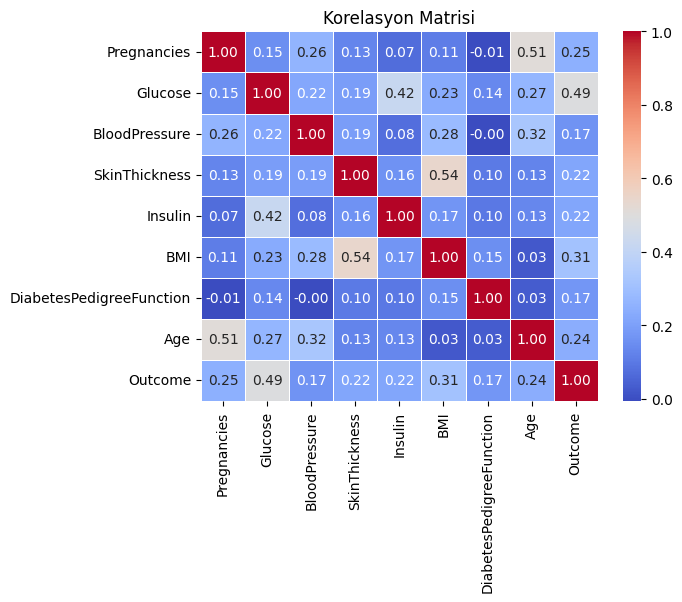

In [ ]:
sns.heatmap(korelasyon, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()

8 - YENİ DEĞİŞKENLER

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.230964,33.6,0.627,50.0,1
1,1.000000,85.0,66.0,29.00000,155.230964,26.6,0.351,31.0,0
2,8.000000,183.0,64.0,29.15342,155.230964,23.3,0.672,32.0,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1


In [ ]:
df["GLU_INS"] = df["Glucose"] * df["Insulin"]
df["AGE_BMI"] = df["Age"] * df["BMI"]
df["BMI_KATEGORİ"] = pd.qcut(df["BMI"], 4, labels=["Zayıf", "Normal", "Kilolu", "Obez"])
df["AGE_KATEGORİ"] = pd.qcut(df["Age"], 4, labels=["Genç", "Orta Yaşlı", "Yetişkin", "Yaşlı"])
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GLU_AGE,GLU_INS,AGE_BMI,BMI_KATEGORİ,AGE_KATEGORİ
0,6.000000,148.0,72.0,35.00000,155.230964,33.6,0.627,50.0,1,7400.0,22974.182741,1680.0,Kilolu,Yaşlı
1,1.000000,85.0,66.0,29.00000,155.230964,26.6,0.351,31.0,0,2635.0,13194.631980,824.6,Zayıf,Yetişkin
2,8.000000,183.0,64.0,29.15342,155.230964,23.3,0.672,32.0,1,5856.0,28407.266497,745.6,Zayıf,Yetişkin
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0,1869.0,8366.000000,590.1,Normal,Genç
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1,4521.0,23016.000000,1422.3,Obez,Yetişkin


9 - ENCODING

In [ ]:
binary_cols = [col for col in df.columns if df[col].dtypes not in [int, float]
               and df[col].nunique() == 2]

binary_cols

[]

In [ ]:
# veri tiplerini belirleme
def grab_col_names(dataframe, cat_th=10, car_th=20):
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
  num_cols = [col for col in num_cols if col not in num_but_cat]

  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f'cat_cols: {len(cat_cols)}')
  print(f'num_cols: {len(num_cols)}')
  print(f'cat_but_car: {len(cat_but_car)}')
  print(f'num_but_cat: {len(num_but_cat)}')
  return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols, num_cols, cat_but_car

Observations: 768
Variables: 14
cat_cols: 3
num_cols: 11
cat_but_car: 0
num_but_cat: 3


(['Outcome', 'BMI_KATEGORİ', 'AGE_KATEGORİ'],
 ['Pregnancies',
  'Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age',
  'GLU_AGE',
  'GLU_INS',
  'AGE_BMI'],
 [])

In [ ]:
cat_cols = [col for col in cat_cols if "Outcome" not in col]
cat_cols

['BMI_KATEGORİ', 'AGE_KATEGORİ']

In [ ]:
def rare_analyser(dataframe, target, cat_cols):
  for col in cat_cols:
    print(col, ":", len(dataframe[col].value_counts()))
    print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                        "RATIO": dataframe[col].value_counts() / len(dataframe),
                        "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

# tüm cat değişkenlerin target ile analizi

In [ ]:
rare_analyser(df, "Outcome", cat_cols)

BMI_KATEGORİ : 4
              COUNT     RATIO  TARGET_MEAN
BMI_KATEGORİ                              
Zayıf           193  0.251302     0.113990
Normal          197  0.256510     0.365482
Kilolu          190  0.247396     0.436842
Obez            188  0.244792     0.484043


AGE_KATEGORİ : 4
              COUNT     RATIO  TARGET_MEAN
AGE_KATEGORİ                              
Genç            219  0.285156     0.141553
Orta Yaşlı      177  0.230469     0.299435
Yetişkin        200  0.260417     0.475000
Yaşlı           172  0.223958     0.517442




<ipython-input-35-a2862e967ec7>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")
<ipython-input-35-a2862e967ec7>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")


In [ ]:
def rare_encoder(dataframe, rare_perc):
  temp_df = dataframe.copy()

  rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == "O"
                  and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

  for var in rare_columns:
    tmp = temp_df[var].value_counts() / len(temp_df)
    rare_labels = tmp[tmp < rare_perc].index
    temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

  return temp_df

# belli oran (rare_perc) altında kalan kolonları bir araya getirecek

df = rare_encoder(df, 0.01)

In [ ]:
rare_analyser(df, "Outcome", cat_cols)

BMI_KATEGORİ : 4
              COUNT     RATIO  TARGET_MEAN
BMI_KATEGORİ                              
Zayıf           193  0.251302     0.113990
Normal          197  0.256510     0.365482
Kilolu          190  0.247396     0.436842
Obez            188  0.244792     0.484043


AGE_KATEGORİ : 4
              COUNT     RATIO  TARGET_MEAN
AGE_KATEGORİ                              
Genç            219  0.285156     0.141553
Orta Yaşlı      177  0.230469     0.299435
Yetişkin        200  0.260417     0.475000
Yaşlı           172  0.223958     0.517442




<ipython-input-35-a2862e967ec7>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")
<ipython-input-35-a2862e967ec7>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")


In [ ]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
ohe_cols

['BMI_KATEGORİ', 'AGE_KATEGORİ']

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True, dtype="int"):
  dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first, dtype=dtype)
  return dataframe

df = one_hot_encoder(df, ohe_cols)

In [ ]:
df.shape

(768, 18)

9 - STANDART SCALER

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols, num_cols, cat_but_car

Observations: 768
Variables: 18
cat_cols: 7
num_cols: 11
cat_but_car: 0
num_but_cat: 7


(['Outcome',
  'BMI_KATEGORİ_Normal',
  'BMI_KATEGORİ_Kilolu',
  'BMI_KATEGORİ_Obez',
  'AGE_KATEGORİ_Orta Yaşlı',
  'AGE_KATEGORİ_Yetişkin',
  'AGE_KATEGORİ_Yaşlı'],
 ['Pregnancies',
  'Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age',
  'GLU_AGE',
  'GLU_INS',
  'AGE_BMI'],
 [])

In [ ]:
scale = StandardScaler()
df[num_cols] = scale.fit_transform(df[num_cols])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GLU_AGE,GLU_INS,AGE_BMI,BMI_KATEGORİ_Normal,BMI_KATEGORİ_Kilolu,BMI_KATEGORİ_Obez,AGE_KATEGORİ_Orta Yaşlı,AGE_KATEGORİ_Yetişkin,AGE_KATEGORİ_Yaşlı
0,5.062549e-01,0.865108,-0.033518,6.655021e-01,0.000000,0.166292,0.468492,1.425995,1,1.567881,0.198798,1.369035,0,1,0,0,0,1
1,-1.175289e+00,-1.206162,-0.529859,-1.746338e-02,0.000000,-0.852531,-0.365061,-0.190672,0,-0.724000,-0.447158,-0.585931,0,0,0,0,1,0
2,1.178873e+00,2.015813,-0.695306,8.087936e-16,0.000000,-1.332833,0.604397,-0.105584,1,0.825244,0.557662,-0.766480,0,0,0,0,1,0
3,-1.175289e+00,-1.074652,-0.529859,-7.004289e-01,-0.731100,-0.634212,-0.920763,-1.041549,0,-1.092433,-0.766097,-1.121866,1,0,0,0,0,0
4,2.987023e-16,0.503458,-2.680669,6.655021e-01,0.152463,1.548980,5.484909,-0.020496,1,0.183133,0.201560,0.780077,0,0,1,0,1,0


10 - MODEL

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Özellikler ve hedef değişkeni ayır
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelleri tanımla
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Her bir modeli eğit ve test et
for model_name, model in models.items():
    # Modeli eğit
    model.fit(X_train, y_train)

    # Test setinde tahmin yap
    y_pred = model.predict(X_test)

    # Sonuçları yazdır
    print(f"\n{model_name} Model Sonuçları:")
    print(classification_report(y_test, y_pred))


Logistic Regression Model Sonuçları:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        99
           1       0.70      0.69      0.70        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.78      0.79      0.79       154


Decision Tree Model Sonuçları:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        99
           1       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154


Random Forest Model Sonuçları:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73   

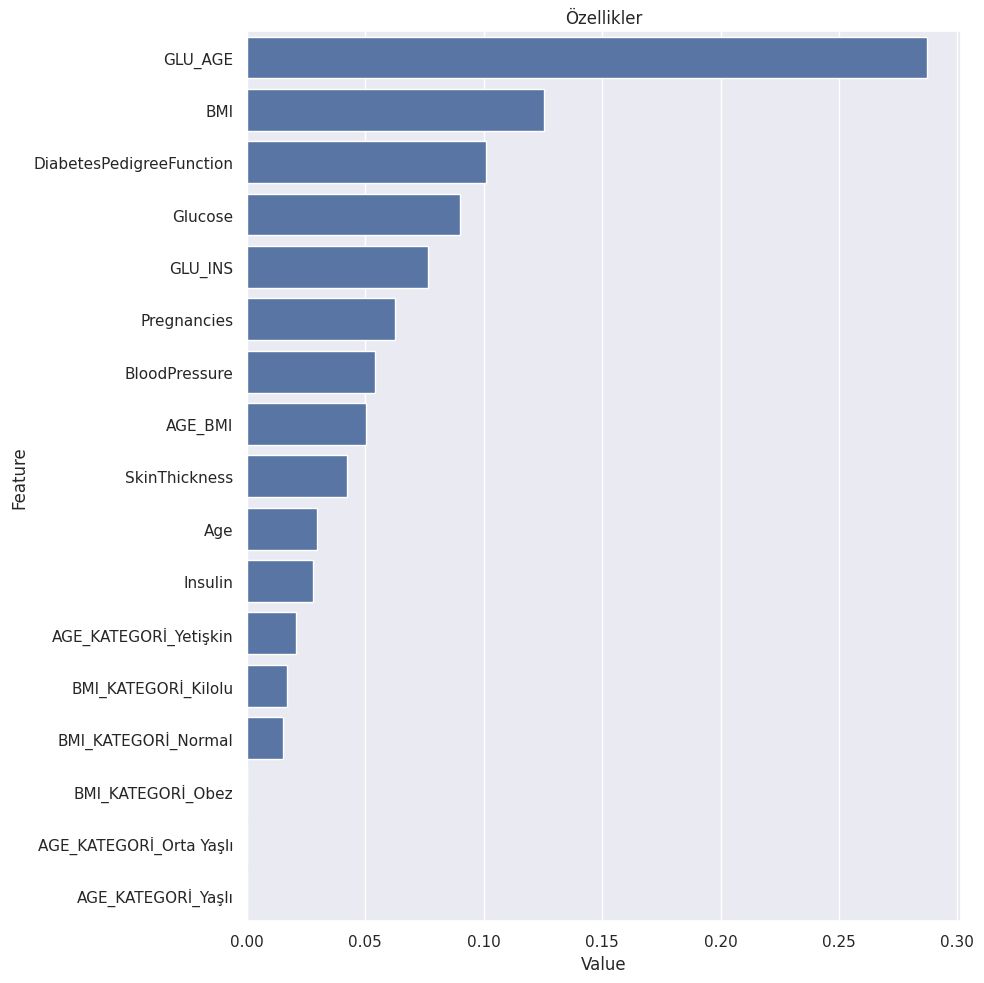

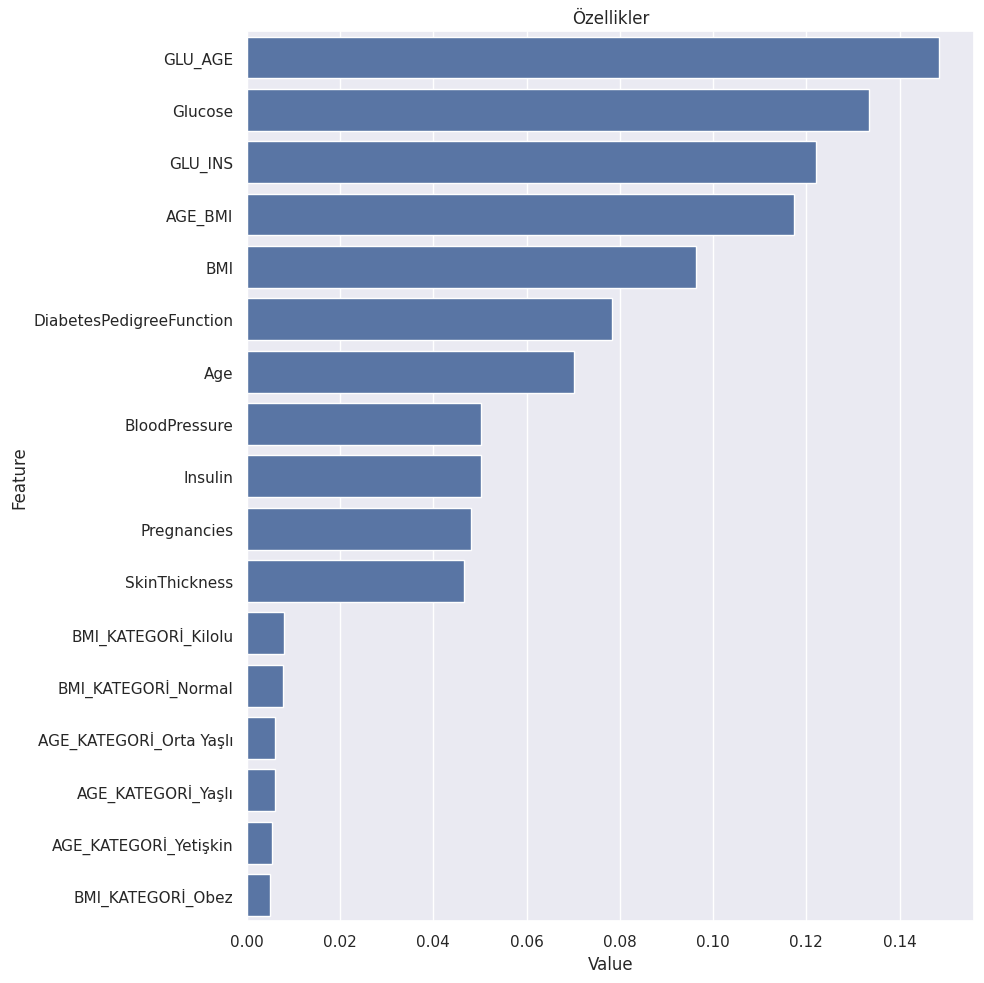

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
  # Modelin feature_importances_ özniteliğine sahip olup olmadığını kontrol et
  if hasattr(model, 'feature_importances_'):
    feature_img = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_img.sort_values(by="Value", ascending=False)[0:num])
    plt.title('Özellikler')
    plt.tight_layout()
    plt.show()
    if save:
      plt.savefig('importances.png')
  else:
    print(f"Öznitelik önemi {type(model).__name__} modeli için mevcut değil.")

for model_name, model in models.items():
     # Modeli eğit
    model.fit(X_train, y_train)

    # Test setinde tahmin yap
    y_pred = model.predict(X_test)

    # Öznitelik önemi varsa çiz
    if model_name in ["Decision Tree", "Random Forest"]:
        plot_importance(model, X_train)
